In [33]:
import numpy as np
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.io

plt.style.use('tableau-colorblind10')

dictionary_matrices = {}
data_structure_values = {}



In [34]:
def loadMNIST( prefix, folder ):
    intType = np.dtype( 'int32' ).newbyteorder( '>' )
    nMetaDataBytes = 4 * intType.itemsize

    data = np.fromfile( folder + "/" + prefix + '-images.idx3-ubyte', dtype = 'ubyte' )
    _, nImages, width, height = np.frombuffer( data[:nMetaDataBytes].tobytes(), intType )
    data = data[nMetaDataBytes:].astype( dtype = 'float32' ).reshape( [ nImages, width, height ] )

    return np.array(data)


def parser(x):
    new_time = ''.join(x.split('.')[0])  # remove microseconds from time data
    try:
        return datetime.strptime(new_time, '%Y-%m-%d %H:%M:%S')  # for bus voltage, battery temp, wheel temp, and wheel rpm data
    except:
        return datetime.strptime(new_time, '%Y-%m-%d')  # for total bus current data

In [35]:
dictionary_matrices['MNIST'] = [loadMNIST( "train", "/Users/scinawa/workspace/Schatten-p-plot/Schatten-p-plot" )]

In [36]:
dictionary_matrices['BankNote'] = [pd.read_csv("bank_note_data.csv", header = 0, sep = ",").to_numpy()]

In [37]:
# ts_with_model = pd.read_csv("/Users/scinawa/workspace/Schatten-p-plot/Schatten-p-plot/WheelRPM.csv", header=0, parse_dates=[0], index_col=0, date_parser=parser)
# ts_with_model.fillna(value=0, inplace=True)
# dictionary_matrices['Wheeler'] = [ts_with_model.to_numpy()] 

In [38]:
#dictionary_matrices['Satellite'] = [scipy.io.loadmat('/Users/scinawa/workspace/Schatten-p-plot/Schatten-p-plot/Sat.mat')['X']]

dictionary_matrices['Sparse'] = [scipy.sparse.random(10000, 50, density=0.1).toarray()] 



dictionary_matrices['Cardio'] = [np.load('/Users/scinawa/workspace/Schatten-p-plot/ADBench/adbench/datasets/Classical/6_cardio.npz', allow_pickle=True)['X']]

dictionary_matrices['Fraud'] = [np.load('/Users/scinawa/workspace/Schatten-p-plot/ADBench/adbench/datasets/Classical/13_fraud.npz', allow_pickle=True)['X']]

In [39]:



p_values =[p for p in range(1, 50)]




In [40]:
def compute_rho_value(s,p, normz):
    """ frac{(\sqrt{2}\|A\|)^{p/2}}{\|A\|_p^{p/2}}"""

    #print(p, normz, end=" ")
    #print(s)
    #print(( np.sqrt(2) * normz) ** (p / 2)    / np.sqrt(  np.sum(np.power(np.abs(s), p ) )  ))
    #print("diocan", np.sum([sv**p for sv in s]  ) ) 
    #return   (  np.sqrt(2)*normz /  np.sum([sv**p for sv in s]  ))   ** (p/2)
    return ( np.sqrt(2) * normz) ** (p / 2)    / np.sqrt(  np.sum(np.power(np.abs(s), p ) )  )


In [41]:
# _, singval, _ = np.linalg.svd(dictionary_matrices["Wheeler"])
# print("done svd")
# # singval = singval / np.max(singval) # normalize singular values
# print([compute_rho_value(singval, p, np.max(singval)) for p in p_values])



In [42]:

for matelm in dictionary_matrices:
    print("Matrix", matelm, end=" ")

    _, s, _ = np.linalg.svd(dictionary_matrices[matelm][0][:15000])
    
    # if we want to normalize the singular values
    s = s/np.max(s)
    # print(s)

    
    data_structure_values[matelm] = [compute_rho_value(s, p, np.max(s)) for p in p_values]
    
    print(".")



Matrix MNIST .
Matrix BankNote .
Matrix Sparse .
Matrix Cardio .
Matrix Fraud .


MNIST
BankNote
Sparse
Cardio
Fraud


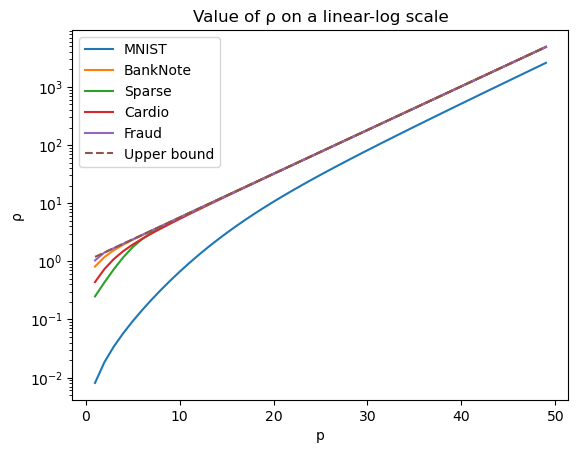

In [43]:
# Plot the values of ρ on a linear-log scale

for matelm in dictionary_matrices:
    print(matelm)
    plt.plot(p_values, data_structure_values[matelm], label=matelm)
    
plt.plot(p_values, [np.sqrt(2)**(p/2) for p in p_values], '--', label='Upper bound')



plt.xlabel('p')
plt.ylabel('ρ')
plt.xscale('linear')
plt.legend()

plt.yscale('log')
plt.title('Value of ρ on a linear-log scale')
plt.show()


